# Generalized Additive Model (GAM) hyperparameter tuning

In [88]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from pygam import GAM, LinearGAM, s, l
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

GAM consists of 3 components:
- Distribution from the exponential familiy
- Link Function
- Functional Form

## 1. Distribution and link function

**Distribution**

Specified via GAM(distribution = "...")

- **"normal"**: symmetric about the mean, data near the mean are more frequent in occurrence than data far from the mean. The distribution takes a bell-curve shape. Type of continuous probability distribution for real-valued random variables, also called Gaussian distribution;
- **"binomial"**: used to model the number of successes (yes/no) in a sample of size N;
- **"poisson"**: expresses the distribution of a given number of events occuring in a fixed interval of time or space if these events occur with a constant mean rate and independelty of time since the last event;
- **"gamma"**: is a two-parameter family of continuous probability distributions. It has a shape parameter k and scale parameter (theta); 
- **"inverse gaussian"**: is a two-parameter family of conitnuous probability distributions with support on (0, ∞). For the distribution 1/x when x is Gaussian. Has several properties analogous to a Gaussian ditribution.

**Link function**

Specified via GAM(link = "...")

Link functions take the distribution mean to the linear prediction. A link function in a GLM maps a non-linear relationship to a linear one, which means you can a fit a linear model to the data. Which link function you use depends upon what analysis you're performing. A link function is simply a function of the mean of the response variable Y that we use as the response instead of Y itself.

- **"identity"**: is link function used for linear regression. An identity function maps every element in a set into itself. The linear model directly predicts the outcome. The link function for a normal distribution is also the identity function; 
- **"logit"**: used for logistic regression. When Y is categorical, we use the logit of Y as the response in our regression equation instead of just Y. The logit function is the natural log of the odds that Y equals one of the categories;
- **"inverse"**: used for regression with gamma distributed response. Inverse link functions are used to make linear predictors map to predicted values that are on a different scale;
- **"log"**: used along with poisson log-linear models for counts. A natural fit for count variables that follow Poisson or negative binomial distribution is the log link. The log link exponentiates the linear predictors. It does not log transform the outcome variable;
- **"inverse-squared"**: canonical link associated with family of inverse-gaussian probability distributions.

### 1.1. Normal distribution and identity link

In [2]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_100_df.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,Grass%_100,Shrubs%_100,geometry
0,0.641659,0.780488,0.787667,0.158730,0.129252,POINT (400173.361 405813.506)
1,0.675657,0.665080,0.210689,0.038549,0.482993,POINT (372621.724 413362.205)
2,0.871239,1.000000,0.426927,0.489796,0.192744,POINT (383564.442 390537.080)
3,0.805049,0.916716,0.253443,0.056689,0.696145,POINT (390233.154 383013.102)
4,0.472362,0.403331,0.158479,0.156463,0.124717,POINT (391596.504 398918.321)


In [60]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
df = pd.DataFrame(gdf_100, columns=cols)

# target as NDVI_100
target = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# define X and Y
#X = df
y = target['NDVI_100']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# GAM model with normal distribution of Y and identity link
gam_100_dist_n = GAM(distribution='normal', link='identity').fit(X_train, y_train)

# check model statistics
gam_100_dist_n.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.8539
Link Function:                     IdentityLink Log Likelihood:                               -182983.3579
Number of Samples:                         4668 AIC:                                           366058.4235
                                                AICc:                                          366059.3533
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5514
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1287724214.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_dist_n.summary()


Fitting a GAM model with normal distribution and identity link function to NDVI data outputs the following statistic coefficients; Effective DoF ~ 44, Log likelihood ~ -182983.3579, AIC and AICc ~ 366058 (e.g. indicating that the sample size is large enough), GCV ~ 0.0118, Scale ~ 0.0116, and Pseudo R-squared ~ 0.5514.

### 1.2. Gamma distribution and inverse/log link

In [5]:
# GAM model with gamma distribution of Y and inverse/log link
#gam_100_dist_g = GAM(distribution='gamma', link='log').fit(X_train, y_train)
gam_100_dist_g = GAM(distribution='gamma', link='inverse').fit(X_train, y_train)

# check model statistics
gam_100_dist_g.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     41.2536
Link Function:                      InverseLink Log Likelihood:                                       -inf
Number of Samples:                         4668 AIC:                                                   inf
                                                AICc:                                                  inf
                                                GCV:                                                   inf
                                                Scale:                                              0.0347
                                                Pseudo R-Squared:                                      nan
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:529: RuntimeWarning: divide by zero encountered in log
  dev = 2 * ((y - mu) / mu - np.log(y / mu))
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  r2['explained_deviance'] = 1. - full_d.sum()/null_d.sum()
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll
/var/folders/6g/kgz

Fitting a GAM model with gamma distribution and inverse or log link function to NDVI data outputs statistics coefficients too small, too large or/and null. For instange, Log likelihood statistic takes -∞, AIC, AICc, and GCV take +∞, and Pseudo R-squared takes nan, which might indicate that the data we are trying to fit (e.g. NDVI) does not follow a gamma probability distribution nor that predictors map to a response variable using an inverse or log link function. 

### 1.3. Inverse gaussian distribution and inverse-squared/log link

In [6]:
# GAM model with inverse gaussian distribution of Y and inverse-squared or log link
gam_100_dist_i = GAM(distribution='inv_gauss', link='inv_squared').fit(X_train, y_train)
#gam_100_dist_i = GAM(distribution='inv_gauss', link='log').fit(X_train, y_train)

# check model statistics
gam_100_dist_i.summary()

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/links.py:320: RuntimeWarning: invalid value encountered in power
  return lp ** -0.5
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/distributions.py:639: RuntimeWarning: divide by zero encountered in true_divide
  dev = ((y - mu)**2) / (mu**2 * y)
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                      InvGaussDist Effective DoF:                                     31.9667
Link Function:                   InvSquaredLink Log Likelihood:                                       -inf
Number of Samples:                         4668 AIC:                                                   inf
                                                AICc:                                                  inf
                                                GCV:                                                   inf
                                                Scale:                                              0.0653
                                                Pseudo R-Squared:                                      nan
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1111: RuntimeWarning: invalid value encountered in double_scalars
  r2['explained_deviance'] = 1. - full_d.sum()/null_d.sum()
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1424524372.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_dist_i.summary()


Fitting a GAM model with inverse gaussian distribution and inverse-squared or log link function to NDVI data outputs statistics coefficients too small, too large or/and null. For instange, Log likelihood statistic takes -∞, AIC, AICc, and GCV take +∞, and Pseudo R-squared takes nan, which might indicate that the data we are trying to fit (e.g. NDVI) does not follow an inverse gaussian probability distribution nor that predictors map to a response variable using an inverse-squared or log link function.

## 2. Functional form

**Functional Form**

Specified in GAM(terms="...") or simply GAM(...)

- **l( ) linear terms**: for terms like Xi. If a term of a polynomial contains a variable with exponent 1, we call it linear term;
- **s( ) spline terms**: are normally used when one knows that the relation between an independent variable and dependent/target variable is non-linear in nature and can be best depicted by a polynomial relation. The name of splines are related to its order. For example, cubic splines correspond to n=3 (order). Two types of spline terms; p-spline and cyclic p-spline basis, useful for building periodic functions. For controlling the shape of spline term we use two parameters, which are n_splines which is a integer term, lam, which is short for lambda, the penalization parameter.
- **f( ) factor terms**: a factor is a vector whose elements can take on one of a specific set of values. For example, "Sex" will usually take on only the values "M" and "F". Also known as categorical variable;
- **te( ) tensor products**: the tensor product of two vector spaces V and W (over the same field) is a vector space to which is associated a bilinear map that maps a pair to an element of. Used to fit interactions in pyGAM;
- **intercept**: if intercept=True, the model includes an intercept by default. It is the point where a line crosses the x-axis or y-axis.

**In Practice**

In pyGAM you can build custom models by specifying these 3 elements, or you can choose from common models:

- **LinearGAM**: identity link and normal distribution of response variable Y (and normal error distribution);
- **LogisticGAM**: logit link and binomial distribution of Y;
- **PoissonGAM**: log link and Poisson distribution of Y;
- **GammaGAM**: log link and gamma distribution of Y;
- **InvGauss**: log link and inv_gauss distribution of Y.

From the previous section, we assessed that fitting a GAM model with **normal distribution and identity link function to NDVI data performed best**. So, we can use the common model **LinearGam**, which already uses a normal distribution and identity link, instead of the custom GAM and avoid larger chunks of code.

### 2.1. NDVI ~ l(grass) + s(canopy) + s(shrubs)

In [7]:
# GAM model: NDVI ~ l(grass) + s(canopy) + s(shrubs)
#gam_100_funct_1 = LinearGAM(l(0) + s(1) + s(2)).gridsearch(X_train, y_train)
gam_100_funct_1 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# check model statistics
gam_100_funct_1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     31.7222
Link Function:                     IdentityLink Log Likelihood:                               -182774.6652
Number of Samples:                         4668 AIC:                                           365614.7748
                                                AICc:                                           365615.251
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5484
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3402436101.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_1.summary()


### 2.2. NDVI ~ s(grass) + l(canopy) + s(shrubs)

In [8]:
# GAM model: NDVI ~ s(grass) + l(canopy) + s(shrubs)
#gam_100_funct_2 = LinearGAM(s(0) + l(1) + s(2)).gridsearch(X_train, y_train)
gam_100_funct_2 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# check model statistics
gam_100_funct_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     31.7374
Link Function:                     IdentityLink Log Likelihood:                               -177390.1667
Number of Samples:                         4668 AIC:                                           354845.8081
                                                AICc:                                          354846.2847
                                                GCV:                                                0.0121
                                                Scale:                                               0.012
                                                Pseudo R-Squared:                                   0.5355
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1395283057.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_2.summary()


### 2.3. NDVI ~ s(grass) + s(canopy) + l(shrubs)

In [9]:
# GAM model: NDVI ~ s(grass) + s(canopy) + l(shrubs)
#gam_100_funct_3 = LinearGAM(s(0) + s(1) + l(2)).gridsearch(X_train, y_train)
gam_100_funct_3 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# check model statistics
gam_100_funct_3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.3475
Link Function:                     IdentityLink Log Likelihood:                               -161472.7391
Number of Samples:                         4668 AIC:                                           323008.1733
                                                AICc:                                          323008.6108
                                                GCV:                                                0.0132
                                                Scale:                                              0.0131
                                                Pseudo R-Squared:                                   0.4925
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3062727570.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_3.summary()


### 2.4. NDVI ~ l(grass) + l(canopy) + s(shrubs)

In [10]:
# GAM model: NDVI ~ l(grass) + l(canopy) + s(shrubs)
#gam_100_funct_4 = LinearGAM(l(0) + l(1) + s(2)).gridsearch(X_train, y_train)
gam_100_funct_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# check model statistics
gam_100_funct_4.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     18.5982
Link Function:                     IdentityLink Log Likelihood:                               -177130.8256
Number of Samples:                         4668 AIC:                                           354300.8476
                                                AICc:                                          354301.0214
                                                GCV:                                                0.0121
                                                Scale:                                               0.012
                                                Pseudo R-Squared:                                   0.5322
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3320750960.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_4.summary()


### 2.5. NDVI ~ l(grass) + s(grass) + s(canopy) + s(shrubs)

In [11]:
# GAM model: NDVI ~ l(grass) + s(grass) + s(canopy) + s(shrubs)
#gam_100_funct_5 = LinearGAM(l(0) + s(0) + s(1) + s(2)).gridsearch(X_train, y_train)
gam_100_funct_5 = LinearGAM(l(0) + s(0) + s(1) + s(2)).fit(X_train, y_train)

# check model statistics
gam_100_funct_5.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.8539
Link Function:                     IdentityLink Log Likelihood:                               -182983.3579
Number of Samples:                         4668 AIC:                                           366058.4235
                                                AICc:                                          366059.3533
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5514
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/518690504.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_5.summary()


### 2.6. NDVI ~ automatic terms

In [12]:
# GAM model: NDVI ~ automatic terms
#gam_100_funct_6 = LinearGAM().gridsearch(X_train, y_train)
gam_100_funct_6 = LinearGAM().fit(X_train, y_train)

# check model statistics
gam_100_funct_6.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.8539
Link Function:                     IdentityLink Log Likelihood:                               -182983.3579
Number of Samples:                         4668 AIC:                                           366058.4235
                                                AICc:                                          366059.3533
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5514
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/430702205.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_funct_6.summary()


**Functional form tuning** 

After trying all possible combinations of linear and spline terms, we selected the **models with the lowest GCV score**. It seems best practice to select between GAM models based on the lowest Generalized Cross Validation (GCV) score, which is an **unbiased estimator of MSE**. 

- **Model 1**: NDVI ~ spline(Grass%) + spline(Canopy%) + spline(Shrubs%) 
- **Model 2**: NDVI ~ linear(Grass%) + spline(Canopy%) + spline(Shrubs%) 
- **Model 3**: NDVI ~ linear(Grass%) + linear(Canopy%) + spline(Shrubs%)

Additionally, we could argue in favour of **less complex models** and strive for the model performing best **combining GCV, DoF, and AIC**. Unfortunately, we found that adding both linear and spline terms to the same feature did not improve the model.

## 3. Regularization penalty (lambda)

**Lambda** 

Lambda controls the strength of the regularization penalty on each term (also called regularization rate). Larger values enforce stronger smoothing. Terms can have multiple penalties, and therefore multiple lambdas. When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit. If your lambda is too high, your model will be simple, but you run the risk of underfitting your data. If your  lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. The ideal value of lambda produces a model that generalizes well to new, previously unseen data. 

Unfortunately, that ideal value of lambda is data-dependent, so some tuning is required. We can **perform a grid-search over multiple lam values to see if we can improve our model**. We will seek the model with the lowest generalized cross-validation (GCV) score. By default in pyGAM, spline terms use 2nd derivative smoothing for numerical dtypes, which encourages the functions to be smoother, and L2/ridge smoothing for categorical dtypes. Factor terms and linear terms have a l2, i.e. ridge penalty, which encourages them to take on smaller values.

In [13]:
# GAM model with lambda = 10
gam_100_lam_1 = LinearGAM(lam=10).fit(X_train, y_train)

# check model statistics
gam_100_lam_1.summary()

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.0922
Link Function:                     IdentityLink Log Likelihood:                               -182245.7312
Number of Samples:                         4668 AIC:                                           364553.6469
                                                AICc:                                          364554.0774
                                                GCV:                                                0.0118
                                                Scale:                                              0.0117
                                                Pseudo R-Squared:                                   0.5468
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1115933263.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_lam_1.summary()


In [14]:
# GAM model with lambda = 5
gam_100_lam_2 = LinearGAM(lam=5).fit(X_train, y_train)

# check model statistics
gam_100_lam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       33.76
Link Function:                     IdentityLink Log Likelihood:                               -182505.0966
Number of Samples:                         4668 AIC:                                           365079.7133
                                                AICc:                                            365080.25
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5481
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3093255912.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_lam_2.summary()


In [15]:
# GAM model with lambda = 3
gam_100_lam_3 = LinearGAM(lam=3).fit(X_train, y_train)

# check model statistics
gam_100_lam_3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      36.512
Link Function:                     IdentityLink Log Likelihood:                               -182637.8372
Number of Samples:                         4668 AIC:                                           365350.6984
                                                AICc:                                          365351.3225
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                    0.549
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1381891552.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_lam_3.summary()


In [16]:
# GAM model with lambda = 0.2
gam_100_lam_4 = LinearGAM(s(0) + s(1) + s(2), lam=0.2).fit(X_train, y_train)

# check model statistics
gam_100_lam_4.summary()

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.5642
Link Function:                     IdentityLink Log Likelihood:                               -183067.4462
Number of Samples:                         4668 AIC:                                           366236.0209
                                                AICc:                                          366237.1504
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5525
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3450052795.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_lam_4.summary()


**Optimal regularization parameter**

Lambda parameters seems to be more flexible, as GCV score maintains low for several values of lambda [0.2 - 10]. In this case, we can study other statistics like DoF or Pseudo R-squared to compare between models and select the best one. For instance, we could prefer a simpler model than a more complex once, meaning lower DoF.

## 4. Smoothness (n_splines)

**n_splines (Rank)** 

The parameter n_splines refers to the number of splines to use for the feature function. The type of basis function to use in the term is p-spline basis, default, or cyclic p-spline basis, used to build periodic functions. The term p-spline stands for "penalized B-spline". It refers to using the B-spline representation where the coefficients are partly determined by the data to be fitted, and partly by an additional penalty function that aims to impose smoothness to avoid overfitting. 

A spline function of order n (spline_order) is a picewise polynomial function (function defined by multiple sub-functions, were each sub-function applies to a different interval in the domain) of degree n-1 in a variable x. B-splines of order n are basis functions (an element of a particular basis for a function space) for spline functions of the same order defined over the same knots, meaning that all possible spline fucntions can be built from a linear combination of B-splines, and there is only one unique combination for each spline function. So, the higher n_spline you fit, the more higher degree polynomial is going to fit to your data for that particular feature.

In [17]:
# GAM model with n_splines = 100
gam_100_spl_1 = LinearGAM(n_splines = 100).fit(X_train, y_train)

# check model statistics
gam_100_spl_1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    194.1506
Link Function:                     IdentityLink Log Likelihood:                               -178798.3708
Number of Samples:                         4668 AIC:                                           357987.0428
                                                AICc:                                          358004.1628
                                                GCV:                                                0.0124
                                                Scale:                                              0.0114
                                                Pseudo R-Squared:                                   0.5711
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1774563792.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_spl_1.summary()


In [18]:
# GAM model with n_splines = 50
gam_100_spl_2 = LinearGAM(n_splines = 50).fit(X_train, y_train)

# check model statistics
gam_100_spl_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    105.8701
Link Function:                     IdentityLink Log Likelihood:                               -181774.3063
Number of Samples:                         4668 AIC:                                           363762.3528
                                                AICc:                                          363767.4088
                                                GCV:                                                 0.012
                                                Scale:                                              0.0115
                                                Pseudo R-Squared:                                   0.5606
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/4172701601.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_spl_2.summary()


In [19]:
# GAM model with n_splines = 25
gam_100_spl_3 = LinearGAM(n_splines = 25).fit(X_train, y_train)

# check model statistics
gam_100_spl_3.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     55.6687
Link Function:                     IdentityLink Log Likelihood:                               -182732.5536
Number of Samples:                         4668 AIC:                                           365578.4446
                                                AICc:                                          365579.8623
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                    0.553
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/2764893127.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_spl_3.summary()


In [20]:
# GAM model with n_splines = 15
gam_100_spl_4 = LinearGAM(n_splines = 15).fit(X_train, y_train)

# check model statistics
gam_100_spl_4.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     33.5762
Link Function:                     IdentityLink Log Likelihood:                               -182961.1858
Number of Samples:                         4668 AIC:                                           365991.5239
                                                AICc:                                           365992.055
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5492
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/127136797.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_spl_4.summary()


In [21]:
# GAM model with n_splines = 5
gam_100_spl_5 = LinearGAM(n_splines = 5).fit(X_train, y_train)

# check model statistics
gam_100_spl_5.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.2126
Link Function:                     IdentityLink Log Likelihood:                               -175002.6052
Number of Samples:                         4668 AIC:                                           350025.6356
                                                AICc:                                          350025.6847
                                                GCV:                                                0.0122
                                                Scale:                                              0.0122
                                                Pseudo R-Squared:                                   0.5249
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/926768180.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_spl_5.summary()


**Optimal smoothness parameter**

After tuning the n_splines parameter, we observe that **optimal values of n_splines lay between 15 and 25** since the associated models have lowest GCV score (~0.0118).

## 5. How to choose the best model

### 5.1. LinearGAM statistics summary


- **Effective Degrees of Freedom (DoF)**: is the number of values in the final calculation of a statistic that are free to vary. The concern is that if there are more degrees of freedom (model parameters) in machine learning, then the model is expected to overfit the training dataset. This expectation can be overcome through the use of regularization techniques, such as regularization linear regression. The degrees of freedom are an accounting of how many parameters are estimated by the model and, by extension, a measure of complexity for linear regression models. We often **prefer lower complexity models over higher complexity models**. Simpler models generalize better.


- **Log Likelihood**: the log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The **higher the value of the log-likelihood, the better a model fits a dataset**. The actual log-likelihood value for a given model is mostly meaningless, but it's useful for comparing two or more models.


- **AIC**: is an estimator of prediction error and relative quality of statistical models for a given set of data. AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model. Given a set of candidate models for the data, the **preferred model is the one with the minimum AIC value**. Thus, AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, which is desired because increasing the number of parameters in the model almost always improves the goodness of fit.


- **AICc**: is AIC with a correction (extra penalty term for the number of parameters) for small sample sizes. When the sample is small, there is a probability that AIC will select models that have too many parameters, i.e. that AIC will overfit. As n -> ∞, the extra penalty term converges to 0, and thus AICc converges to AIC.


- **Generalized cross-validation (GCV)**: is a model validation technique for assessing how good the results of a statistical analysis will generalize to an independent data set. It can be taken as an estimate of the mean square prediction error (MSE) based on a leave-one-out cross validation estimation process. GCV provides an approximately unbiased estimate of the prediction error (MSE). This is one of the most important approaches used to estimate parameters in the context of inverse problems and regularization techniques. A notable example is the determination of the smoothness parameter in splines. The **chosen tuning parameters are the ones giving the smallest GCV error**. 


- **Scale**: the scale parameter is an estimated model parameter related to the variance of the response. It is a special kind of numerical parameter of a parametric family of probability distributions. The larger the scale parameter, the more spread out the distribution. It measures the statistical dispersion of the distribution. If models with unknown scale, grid search will optimize GCV, and for known scale, it will optimize UBRE.


- **Pseudo R-Squared**: measure to evaluate the goodness of fit of certain Nonlinear regression models. While pseudo R-squareds cannot be compared independently or compared across datasets, they are valid and useful in evaluating multiple models predicting the same outcome on the same dataset. A pseudo R-squared statistic without context has little meaning. A pseudo R-squared only has meaning when compared to another pseudo R-squared of the same type, on the same data, predicting the same outcome. Then, the **higher pseudo R-squared indicates which model better predicts the outcome**.

### 5.2. fit() vs. gridsearch()

The **fit()** function fits the generalized additive model and returns a fitted GAM object. Whereas **gridsearch()** function performs a grid search over a space of parameters for a given objective. The metric to optimize can be AIC, AICc, GCV or UBRE. If 'auto' is selected, then grid search will optimize GCV for models with unknown scale and UBRE for models with known scale. If no lambda parameter is specified, gridsearch will select a **common lambda** for all features that minimizes GCV score. Furthermore, we can easily allow gridsearch to select a **unique lambda for each feature** minimizing the overall GCV score by passing a lambda iterable into the lambda parameter.

In [92]:
# GAM model using fit()
gam_100_fit = LinearGAM().fit(X_train, y_train)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# check model statistics
gam_100_fit.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.8539
Link Function:                     IdentityLink Log Likelihood:                               -182983.3579
Number of Samples:                         4668 AIC:                                           366058.4235
                                                AICc:                                          366059.3533
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5514
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/3040872960.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_fit.summary()


In [93]:
# GAM model using gridsearch()
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_100_grid = LinearGAM(s(0) + s(1) + s(2)).gridsearch(X_train, y_train)

# check model statistics
gam_100_grid.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     42.3231
Link Function:                     IdentityLink Log Likelihood:                               -182881.0876
Number of Samples:                         4668 AIC:                                           365848.8216
                                                AICc:                                          365849.6522
                                                GCV:                                                0.0118
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5507
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/2995102486.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_grid.summary()


It seems that gridsearch() outputs a GAM model with the same GCV score and lower DoF. Therefore, we prefer to use gridsearch() to find the best GAM model.

### 5.3. Optimizing for lowest GCV score

Using gridsearch() automatically tune a common lambda for all parameters that minimize the GCV score. Additionally, we can pass an **iterable to the lambdas parameter** and get a unique lambda for each term that minimizes GCV score instead of a common lambda, which outputs a model with lower GCV score.

In [94]:
# GAM model gridsearch() iterable lambdas (one for each term)
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_100_1 = LinearGAM().fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 3, 5)
lams = [lam] * 3

gam_100_1.gridsearch(X_train, y_train, lam=lams)
gam_100_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      34.274
Link Function:                     IdentityLink Log Likelihood:                               -183529.9415
Number of Samples:                         4668 AIC:                                            367130.431
                                                AICc:                                          367130.9835
                                                GCV:                                                0.0117
                                                Scale:                                              0.0116
                                                Pseudo R-Squared:                                   0.5506
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/4200477633.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_1.summary()


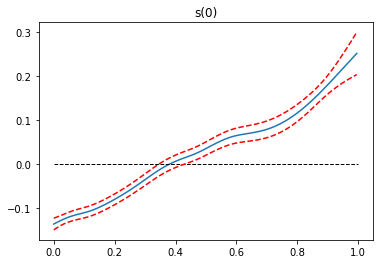

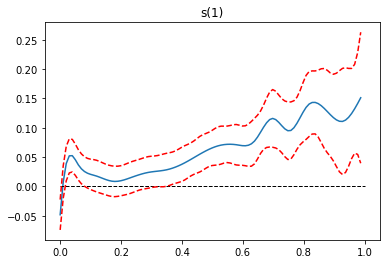

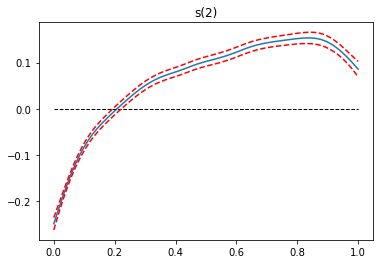

In [73]:
for i, term in enumerate(gam_100_1.terms):
    if term.isintercept:
        continue

    XX = gam_100_1.generate_X_grid(term=i)
    pdep, confi = gam_100_1.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

<Figure size 432x288 with 0 Axes>

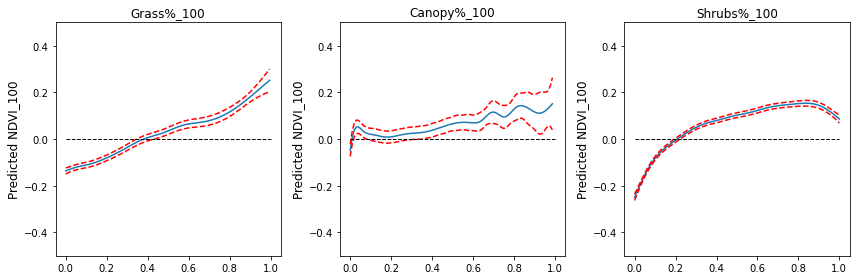

In [85]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3, figsize=(12,4));

titles = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
for i, ax in enumerate(axs):
    XX = gam_100_1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_100_1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_100_1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_100', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

**Partial dependence plot: interpretating negative values of y axis**

Above, we ploted partial dependence between dependent variables (Grass%_100, Canopy%_100, and Shrubs%_100) and independent variable (NDVI_100). We are observing **changes relative to a central tendency (mean)**. Therefore, negative values on y axis are relative to the mean of NDVI_100. For instance, lower levels of Grass%_100 predict NDVI_100 values below its mean. 

- **GAM model NDVI_100 optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_100 ~ spline(grass%_100) + spline(canopy%_100) + spline(shrubs%_100)
    - **Regularization penalty**: lambda = [31.6228, 0.0316, 31.6228]
    - **Smoothness**: n_splines = 20
    
GCV score is ~0.0117, indicating a low probability of overfitting.

### 5.4. Optimizing for combination of GCV, AIC, and DoF (simpler-version)

Otherwise, if we are interested in selecting a simpler model, we could also choose the model that performs best combining the scores for GCV, AIC, and DoF. For instance, one could prefer a model with slightly higher GCV, but with considerable less degrees of freedom. **Less complex models imply lower probability of overfitting**.

In [96]:
# GAM model candidate 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_100_2 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_100_2.gridsearch(X_train, y_train, lam=lams)
gam_100_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.5974
Link Function:                     IdentityLink Log Likelihood:                               -177259.9779
Number of Samples:                         4668 AIC:                                           354549.1506
                                                AICc:                                          354549.2485
                                                GCV:                                                0.0121
                                                Scale:                                               0.012
                                                Pseudo R-Squared:                                   0.5315
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/683483071.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100_2.summary()


<Figure size 432x288 with 0 Axes>

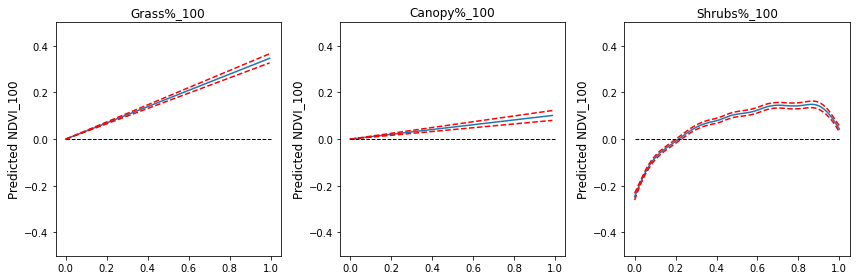

In [120]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3, figsize=(12,4));

titles = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
for i, ax in enumerate(axs):
    XX = gam_100_2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_100_2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_100_2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_100', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_100_simple_plot.png', dpi=300, bbox_inches='tight')

plt.show()

- **GAM model NDVI_100 optimizing for combination of GCV, DoF, and AIC (simpler-version)**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_100 ~ linear(grass%_100) + linear(canopy%_100) + spline(shrubs%_100)
    - **Regularization penalty**: lambda = [0.1, 0.1, 10]
    - **Smoothness**: n_splines = 20

### 6. Robust model predicting NDVI_300

In [99]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_300_df.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,Grass%_300,Shrubs%_300,geometry
0,0.281673,0.336101,1.897265e-01,0.037879,0.101613,POINT (382286.540 396971.736)
1,0.908959,0.961154,2.296515e-01,0.488981,0.274194,POINT (380292.947 385966.872)
2,0.662655,0.751865,2.449267e-01,0.125344,0.338441,POINT (388038.733 412187.156)
3,0.552645,0.994652,1.982036e-16,0.069215,0.897849,POINT (376338.417 418312.798)
4,0.783100,0.884166,2.393294e-01,0.173898,0.659140,POINT (400702.374 407703.870)


In [100]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
df = pd.DataFrame(gdf_300, columns=cols)

# target as NDVI_300
target = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# define X and Y
#X = df
y = target['NDVI_300']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
# GAM model candidate 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_300_1 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_300_1.gridsearch(X_train, y_train, lam=lams)
gam_300_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     36.5322
Link Function:                     IdentityLink Log Likelihood:                               -204839.5577
Number of Samples:                         4688 AIC:                                           409754.1797
                                                AICc:                                          409754.8018
                                                GCV:                                                0.0106
                                                Scale:                                              0.0105
                                                Pseudo R-Squared:                                   0.6532
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/1716297542.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300_1.summary()


In [106]:
# GAM model NDVI_300 candidate 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_300_2 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_300_2.gridsearch(X_train, y_train, lam=lams)
gam_300_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.2975
Link Function:                     IdentityLink Log Likelihood:                               -190341.1612
Number of Samples:                         4688 AIC:                                           380710.9174
                                                AICc:                                           380711.011
                                                GCV:                                                0.0113
                                                Scale:                                              0.0113
                                                Pseudo R-Squared:                                   0.6247
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/2377084933.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300_2.summary()


<Figure size 432x288 with 0 Axes>

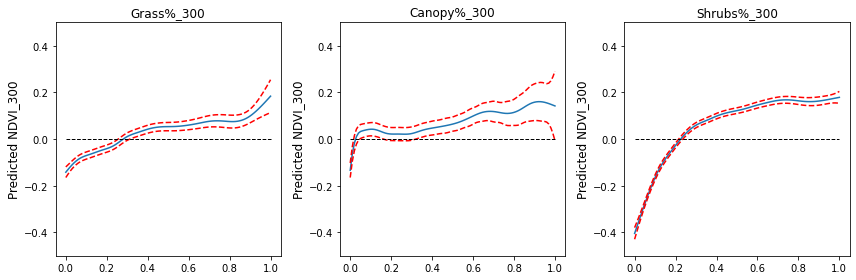

In [103]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
for i, ax in enumerate(axs):
    XX = gam_300_1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_300_1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_300_1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_300', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

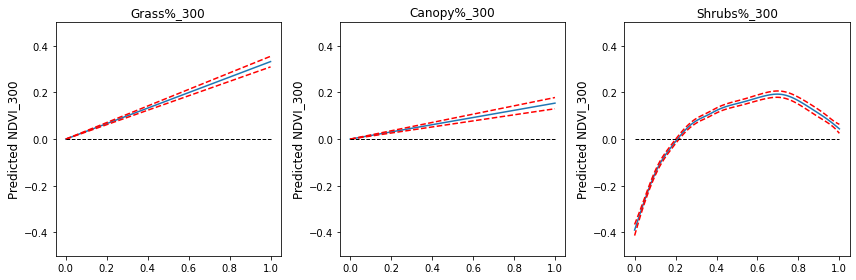

In [107]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
for i, ax in enumerate(axs):
    XX = gam_300_2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_300_2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_300_2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_300', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_300_simple_plot.png', dpi=300, bbox_inches='tight')

plt.show()

- **GAM model NDVI_300 optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_300 ~ spline(grass%_300) + spline(canopy%_300) + spline(shrubs%_300)
    - **Regularization penalty**: lambda = [10, 0.1, 10]
    - **Smoothness**: n_splines = 20
    
    
- **GAM model NDVI_300 optimizing for combination of GCV, DoF, and AIC (simpler-version)**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_300 ~ linear(grass%_300) + linear(canopy%_300) + spline(shrubs%_300)
    - **Regularization penalty**: lambda = [0.1, 0.1, 10]
    - **Smoothness**: n_splines = 20
    
The models have a **low probability of overfitting** since both show low GCV scores (~0.0106 vs. ~0.0113).

### 7. Robust model predicting NDVI_500

In [109]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_500_df.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,Grass%_500,Shrubs%_500,geometry
0,0.705614,0.883310,0.223834,0.096864,0.394812,POINT (362886.156 402352.157)
1,0.617635,0.871672,0.294723,0.504887,0.241740,POINT (354204.802 403929.521)
2,0.482378,0.430316,0.417175,0.186725,0.096558,POINT (379393.300 410476.219)
3,0.612922,0.635173,0.605278,0.147921,0.167965,POINT (385552.048 388856.047)
4,0.880711,0.992519,0.096232,0.329978,0.685176,POINT (367806.732 411583.484)


In [110]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
df = pd.DataFrame(gdf_500, columns=cols)

# target as NDVI_500
target = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# define X and Y
#X = df
y = target['NDVI_500']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# GAM model NDVI_500 candidate 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_500_1 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_500_1.gridsearch(X_train, y_train, lam=lams)
gam_500_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.8662
Link Function:                     IdentityLink Log Likelihood:                                -125883.579
Number of Samples:                         2325 AIC:                                           251820.8904
                                                AICc:                                          251821.5422
                                                GCV:                                                0.0087
                                                Scale:                                              0.0085
                                                Pseudo R-Squared:                                   0.7159
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/2549631320.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500_1.summary()


In [112]:
# GAM model NDVI_500 candidate 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_500_2 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_500_2.gridsearch(X_train, y_train, lam=lams)
gam_500_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.8922
Link Function:                     IdentityLink Log Likelihood:                               -116417.3844
Number of Samples:                         2325 AIC:                                           232860.5531
                                                AICc:                                          232860.7081
                                                GCV:                                                0.0093
                                                Scale:                                              0.0092
                                                Pseudo R-Squared:                                   0.6903
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_1178/2608535482.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500_2.summary()


<Figure size 432x288 with 0 Axes>

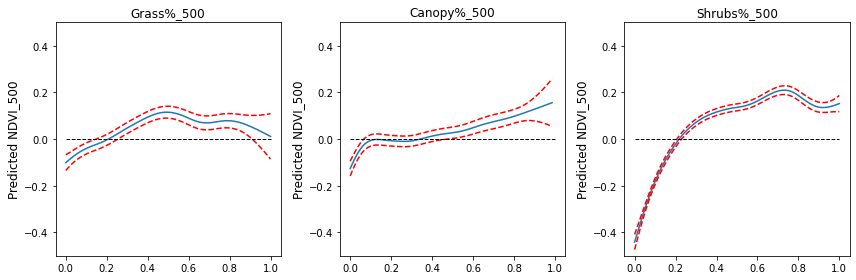

In [115]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
for i, ax in enumerate(axs):
    XX = gam_500_1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_500_1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_500_1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_500', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

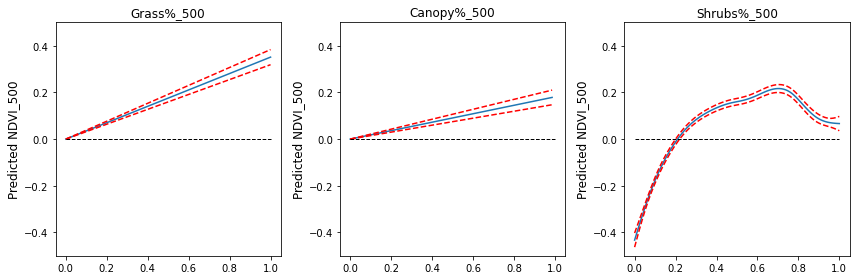

In [116]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
for i, ax in enumerate(axs):
    XX = gam_500_2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_500_2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_500_2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Predicted NDVI_500', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_500_simple_plot.png', dpi=300, bbox_inches='tight')

plt.show()

- **GAM model NDVI_500 optimizing for Generalized Cross Validation (GCV) score**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_500 ~ spline(grass%_500) + spline(canopy%_500) + spline(shrubs%_500)
    - **Regularization penalty**: lambda = 10
    - **Smoothness**: n_splines = 20
    
    
- **GAM model NDVI_500 optimizing for combination of GCV, DoF, and AIC (simpler-version)**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI_500 ~ linear(grass%_500) + linear(canopy%_500) + spline(shrubs%_500)
    - **Regularization penalty**: lambda = 10
    - **Smoothness**: n_splines = [0.1, 0.1, 10]
    
The models have a **low probability of overfitting** since both show low GCV scores (~0.0087 vs. ~0.0093).